# Boston

## Loading libraries

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


## Processing data

In [28]:
boston = datasets.load_boston()
boston_df =  pd.DataFrame(boston.data, columns=boston.feature_names)

print(boston_df.head())

X = boston_df.values
y = boston.target

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## Predicting house value from a single feature

In [29]:
X_rooms = X[:,5]

print(type(X_rooms))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


We need to reshape X & y

In [38]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Now we plot

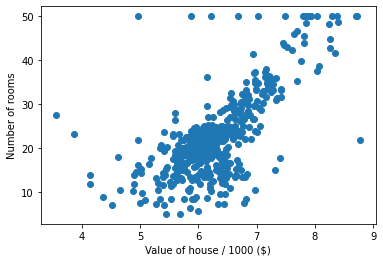

In [39]:
plt.scatter(X_rooms, y)
plt.xlabel("Value of house / 1000 ($)")
plt.ylabel("Number of rooms")
plt.show()

## Fitting a regression model

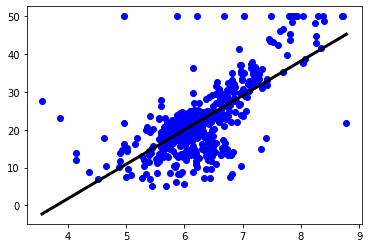

In [49]:
reg = LinearRegression()
reg.fit(X_rooms, y)
#prediction_space = np.linspace(np.min(X_rooms),
#                               np.max(X_rooms)).reshape(-1,1)
prediction_space = np.array([[np.min(X_rooms)],[np.max(X_rooms)]])

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space,reg.predict(prediction_space), color="black", linewidth=3)
plt.show()

Now let's do it by all the features

> This is an example and Linear Regression must not be used like this, but we must use
 > regularization to add constrains to coefficients

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score_regression = reg_all.score(X_test,y_test)
print("Regression score: {}".format(score_regression))

Regression score: 0.7112260057484932


## $R^2$
The score for Linear Regression model uses $R^2$

## Root Mean Squared Error
This is another way to score errors and this is how it is calculated

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Cross Validation

> k-folds Cross validations

We can split the data in different sections and then test the accuracy, we split the data and get one
part to be used as test, and then for n times we do the same using the rest of the parts as test. therefore
all data was used at some point as training and test.

In [56]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_resut = cross_val_score(reg, X, y, cv=5)
print(cv_resut)

# Getting the mean
np.mean(cv_resut)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.3532759243958797

## Regularization

> Penalizing large coefficients

## Regularization Types

### Ridge Regression

Loss Function


Loss function = OLS loss function + $\alpha * \sum_{i=1}^na_i^2$

* Alpha: the parameter we need to choose
    * Picking alpha is similar to picking k in k-NN
    * Hyper Parameter Tuning
    * It controls model complexity
    * When equals to 0 We get back OLS. **Overfitting**
    * When large value can lead to **Underfitting**

In [ ]:
# Ridge Regression

In [65]:
from sklearn.linear_model import  Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127318

# Lasso Regression

Loss function = OLS loss function + $\alpha * \sum_{i=1}^n|a_i|$

In [66]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328548

* Can be used to select important features of a Dataset
* Shrinks the coefficients of less important features to exactly 0

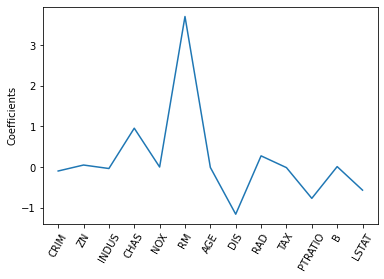

In [67]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.plot(range(len(boston.feature_names)),lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names,rotation=60)
plt.ylabel("Coefficients")
plt.show()

We can see the most important feature is **"Rooms"**

## Which to choose

* Ridge Regression must be the first option
* Lasso is good to identify the most important features

## Lasso Levels

### L1
Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of
each coefficient multiplied by some alpha. This is also known as regularization because the regularization term
is the norm of the coefficients. This is not the only way to regularize.

### L2
If instead you took the sum of the squared values of the coefficients multiplied by some alpha
- like in Ridge regression - you would be computing the norm.


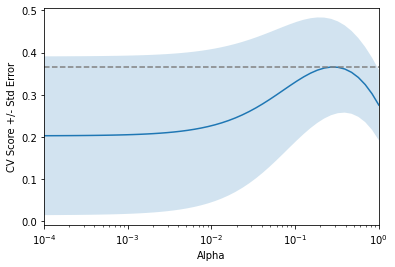

In [68]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)